# Exploring Mental Health Data
## Playground Series - Season 4, Episode 11

In [112]:
import os
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.base import TransformerMixin
from catboost import CatBoostRegressor, Pool
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# loading libraries

In [113]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s4e11/sample_submission.csv
/kaggle/input/playground-series-s4e11/train.csv
/kaggle/input/playground-series-s4e11/test.csv


In [114]:
path = '/kaggle/input/playground-series-s4e11/train.csv' # file path
train = pd.read_csv(path) # read csv file

In [115]:
path = '/kaggle/input/playground-series-s4e11/test.csv' # file path
test = pd.read_csv(path) # read csv file

## Data Exploration

In [116]:
train.info() # summary of dataframe's structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [117]:
train.head(3) # data preview

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1


In [118]:
train.shape # 140700 rows, 20 variables

(140700, 20)

In [119]:
test.info() # summary of dataframe's structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  object 
 3   Age                                    93800 non-null  float64
 4   City                                   93800 non-null  object 
 5   Working Professional or Student        93800 non-null  object 
 6   Profession                             69168 non-null  object 
 7   Academic Pressure                      18767 non-null  float64
 8   Work Pressure                          75022 non-null  float64
 9   CGPA                                   18766 non-null  float64
 10  Study Satisfaction                     18767 non-null  float64
 11  Jo

In [120]:
test.head(3) # data preview

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No


In [121]:
test.shape # 93800 rows, 19 variables

(93800, 19)

In [122]:
train.keys() # column names

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [123]:
test.keys() # column names

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness'],
      dtype='object')

In [124]:
train['Gender'].unique() # there are just 2 possible values for 'Gender' variable

array(['Female', 'Male'], dtype=object)

In [125]:
test['Gender'].unique() 

array(['Male', 'Female'], dtype=object)

In [126]:
train['Working Professional or Student'].unique() # there are just 2 possible values for 'Working or Student' variable

array(['Working Professional', 'Student'], dtype=object)

In [127]:
test['Working Professional or Student'].unique()

array(['Working Professional', 'Student'], dtype=object)

In [128]:
train['Have you ever had suicidal thoughts ?'].unique() # there are 2 possible values for 'Have you ever had suicidal thoughts ?' variable

array(['No', 'Yes'], dtype=object)

In [129]:
test['Have you ever had suicidal thoughts ?'].unique()

array(['No', 'Yes'], dtype=object)

In [130]:
train['Family History of Mental Illness'].unique() # there are 65 possible values for 'Family History of Mental Illness' variable

array(['No', 'Yes'], dtype=object)

In [131]:
test['Family History of Mental Illness'].unique()

array(['Yes', 'No'], dtype=object)

Categories in `train` and `test` sets are not consistent. Below is the list of variables that have both the same number of categories and identical category values:

- Gender
- Working Professional or Student
- Have you ever had suicidal thoughts ?
- Family History of Mental Illness

Variables with more than two categories are inconsistent between the train and test sets. In this analysis, we'll first fit the model(s) using only the variables listed above as a baseline. We'll then incorporate the other variables to enhance prediction accuracy.

### Check for missing values. 

In [132]:
train.isna().sum() 

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [133]:
test.isna().sum()

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                               24632
Academic Pressure                        75033
Work Pressure                            18778
CGPA                                     75034
Study Satisfaction                       75033
Job Satisfaction                         18774
Sleep Duration                               0
Dietary Habits                               5
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

Most missing values are found in the variables: `Profession`, `Academic Pressure`, `Work Pressure`, `CGPA`, `Study Satisfaction`, and `Job Satisfaction`. For `Academic Pressure` and `Work Pressure`, students have **NaN** values in `Work Pressure`, while workers have **NaN** values in `Academic Pressure`. The same pattern applies to `Study Satisfaction` and `Job Satisfaction`. To address this, we'll combine these complementary variables into new ones; i.e. `Academic Pressure` + `Work Pressure` = `Overall Pressure` and `Study Satisfaction` + `Job Satisfaction` = `Overall Satisfaction`.

## Data Preprocessing

In [134]:
unused_vars = ['id', 'Name', 'City', 'Profession', 'CGPA', 'Sleep Duration', 'Dietary Habits', 'Degree'] # unused variables

In [135]:
updated_train = train.drop(columns = unused_vars) # drop unused variables
updated_train.shape

(140700, 12)

In [136]:
updated_test = test.drop(columns = unused_vars) # drop unused variables
updated_test.shape

(93800, 11)

Create new columns by combining the values while ignoring `NaN` values.

In [137]:
updated_train['Overall Pressure'] = updated_train['Academic Pressure'].fillna(updated_train['Work Pressure'])
updated_train['Overall Satisfaction'] = updated_train['Study Satisfaction'].fillna(updated_train['Job Satisfaction'])

In [138]:
updated_train.shape

(140700, 14)

In [139]:
updated_test['Overall Pressure'] = updated_test['Academic Pressure'].fillna(updated_test['Work Pressure'])
updated_test['Overall Satisfaction'] = updated_test['Study Satisfaction'].fillna(updated_test['Job Satisfaction'])

In [140]:
updated_test.shape

(93800, 13)

In [141]:
columns = ['Academic Pressure', 'Work Pressure', 'Study Satisfaction', 'Job Satisfaction']
x_train = updated_train.drop(columns = columns)
x_test = updated_test.drop(columns = columns) # drop repeated columns

In [142]:
x_train.isna().sum() 

Gender                                    0
Age                                       0
Working Professional or Student           0
Have you ever had suicidal thoughts ?     0
Work/Study Hours                          0
Financial Stress                          4
Family History of Mental Illness          0
Depression                                0
Overall Pressure                         21
Overall Satisfaction                     15
dtype: int64

The number of missing values decreases significantly.

In [143]:
x_train = x_train.dropna() # drop missing values

In [144]:
print("The number of observations decreased from {} to {} in the training set.".format(train.shape[0], x_train.shape[0]))

The number of observations decreased from 140700 to 140667 in the training set.


In [145]:
x_train.head(2) # updated training features

,Gender,Age,Working Professional or Student,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Overall Pressure,Overall Satisfaction
0,Female,49.0,Working Professional,No,1.0,2.0,No,0,5.0,2.0
1,Male,26.0,Working Professional,Yes,7.0,3.0,No,1,4.0,3.0


In [146]:
x_train['Family History of Mental Illness'] = x_train['Family History of Mental Illness'].map({'No': 0, 'Yes': 1}) 
x_train['Have you ever had suicidal thoughts ?'] = x_train['Have you ever had suicidal thoughts ?'].map({'No': 0, 'Yes': 1}) # binary variables encoded as Yes = 1 and No = 0

In [147]:
x_train = pd.get_dummies(x_train, columns = ['Gender'], drop_first = True)
x_train = pd.get_dummies(x_train, columns = ['Working Professional or Student'], drop_first = True) # convert categorical variables into indicator variables

In [148]:
x_train.head(2) # updated training features

,Age,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Overall Pressure,Overall Satisfaction,Gender_Male,Working Professional or Student_Working Professional
0,49.0,0,1.0,2.0,0,0,5.0,2.0,False,True
1,26.0,1,7.0,3.0,0,1,4.0,3.0,True,True


In [149]:
x_test.head(2) # updated test features

,Gender,Age,Working Professional or Student,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Overall Pressure,Overall Satisfaction
0,Male,53.0,Working Professional,No,9.0,3.0,Yes,2.0,5.0
1,Female,58.0,Working Professional,No,6.0,4.0,No,2.0,4.0


In [150]:
x_test['Family History of Mental Illness'] = x_test['Family History of Mental Illness'].map({'No': 0, 'Yes': 1}) 
x_test['Have you ever had suicidal thoughts ?'] = x_test['Have you ever had suicidal thoughts ?'].map({'No': 0, 'Yes': 1}) # binary variables encoded as Yes = 1 and No = 0

In [151]:
x_test = pd.get_dummies(x_test, columns = ['Gender'], drop_first = True)
x_test = pd.get_dummies(x_test, columns = ['Working Professional or Student'], drop_first = True) # convert categorical variables into indicator variables

In [152]:
x_test.head(2) # updated test features

,Age,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Overall Pressure,Overall Satisfaction,Gender_Male,Working Professional or Student_Working Professional
0,53.0,0,9.0,3.0,1,2.0,5.0,True,True
1,58.0,0,6.0,4.0,0,2.0,4.0,False,True


There are still a few missing values in the test set. We'll handle these using a mean-based imputer.

In [153]:
x_test.isna().sum()

Age                                                      0
Have you ever had suicidal thoughts ?                    0
Work/Study Hours                                         0
Financial Stress                                         0
Family History of Mental Illness                         0
Overall Pressure                                        12
Overall Satisfaction                                     8
Gender_Male                                              0
Working Professional or Student_Working Professional     0
dtype: int64

In [154]:
imputer = KNNImputer(n_neighbors = 2, weights = 'uniform') # missing values are imputed using the mean value from n_neighbors nearest neighbors
x_test = pd.DataFrame(imputer.fit_transform(x_test), columns = x_test.columns) # fit to data, then transform it

In [155]:
x_test.isna().sum()

Age                                                     0
Have you ever had suicidal thoughts ?                   0
Work/Study Hours                                        0
Financial Stress                                        0
Family History of Mental Illness                        0
Overall Pressure                                        0
Overall Satisfaction                                    0
Gender_Male                                             0
Working Professional or Student_Working Professional    0
dtype: int64

In [156]:
print("The number of observations decreased from {} to {} in the test set.".format(test.shape[0], x_test.shape[0]))

The number of observations decreased from 93800 to 93800 in the test set.


## Fitting a Classification Model

In [157]:
x_train_baseline = x_train
x_test_baseline = x_test # create a copy of both updated sets

In [158]:
y_train = x_train_baseline['Depression'] # training labels
x_train_baseline = x_train_baseline.drop(columns = 'Depression') # training features

Define a Logistic Regression model applying a `L1` penalty.

In [159]:
clf = LogisticRegression(penalty = 'l1', solver = 'liblinear').fit(x_train_baseline, y_train) # adding a L1 penalty term

Coefficients *estimates* that the model learned for each feature. These coefficients indicate the impact each feature has on the model's predictions.

In [160]:
coefficients = clf.coef_[0] #  coefficients of the features
coeff_df = pd.DataFrame({
    'Feature': x_train_baseline.columns,
    'Coefficient': coefficients
}) # coefficients with their corresponding feature

In [161]:
coeff_df = coeff_df.reindex(coeff_df.Coefficient.abs().sort_values(ascending = False).index)
coeff_df

,Feature,Coefficient
1,Have you ever had suicidal thoughts ?,2.478824
8,Working Professional or Student_Working Profes...,-1.881993
5,Overall Pressure,0.730759
3,Financial Stress,0.549353
6,Overall Satisfaction,-0.403171
4,Family History of Mental Illness,0.206649
0,Age,-0.168195
2,Work/Study Hours,0.132482
7,Gender_Male,0.050509


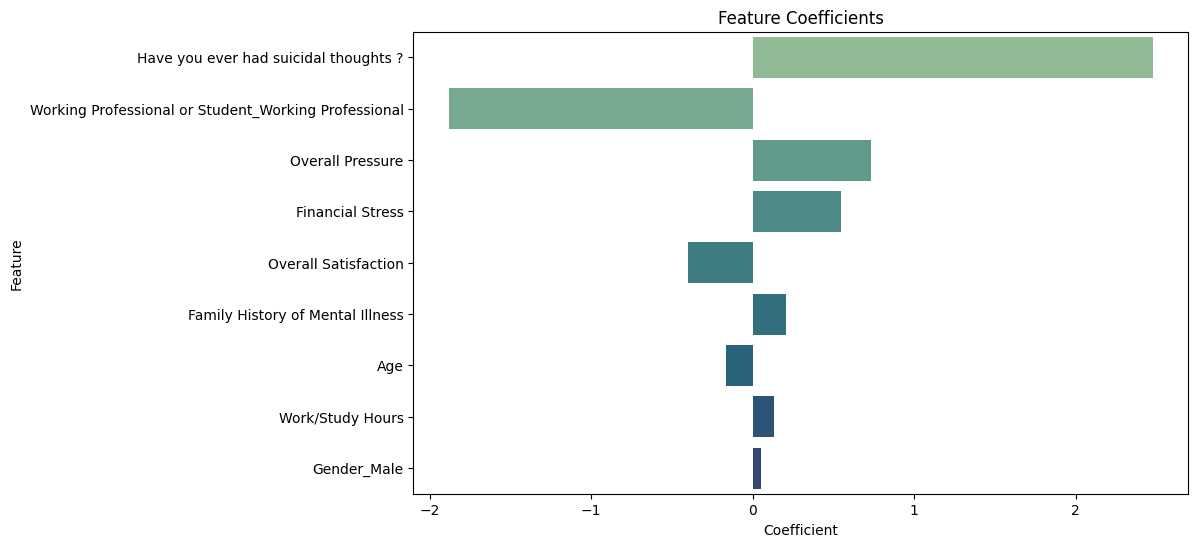

In [162]:
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Coefficient', y = 'Feature', data = coeff_df, palette='crest')
plt.title('Feature Coefficients')
plt.show()

In [163]:
predictions = clf.predict(x_test_baseline) # predict class labels
clf.score(x_train_baseline, y_train) # mean accuracy

0.9345333304897382

The accuracy could be improved by fitting a more sophisticated classification model or by reintroducing some of the categorical variables that were previously excluded during data exploration.

## Hyperparameter Tuning

In [ ]:
parameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
} # norm of the penalty; regularization strength; algorithm to use 

#grid_search = GridSearchCV(LogisticRegression(), parameters, 
                           #cv = 10, scoring = 'accuracy') # exhaustive search over specified parameter values

#grid_search.fit(x_train_baseline, y_train) # fit with all sets of parameters

Parameter setting that gave the best results.

In [164]:
#print("Best parameters:", grid_search.best_params_) 

In [165]:
clf = LogisticRegression(penalty = 'l1', solver = 'saga',
                         C = 0.01).fit(x_train_baseline, y_train) 
clf.score(x_train_baseline, y_train) # fit the log reg model with the specified setting 

0.9346115293565656

**There is not a significant improvement.**

## Ensemble Methods
### Gradient Boosting 

In [166]:
parameters = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
} # no. of boosting stages to perform; learning rate; no. of nodes in the tree

#grid_search = GridSearchCV(GradientBoostingClassifier(random_state = 42), parameters, 
                           #cv = 10, scoring = 'accuracy') # exhaustive search over specified parameter values

#grid_search.fit(x_train_baseline, y_train) # fit with all sets of parameters

In [167]:
#print("Best parameters:", grid_search.best_params_) 

In [168]:
gradient_boosting = GradientBoostingClassifier(n_estimators = 200, learning_rate = 0.2, 
                                               max_depth = 4, random_state = 42).fit(x_train_baseline, y_train) 
gradient_boosting.score(x_train_baseline, y_train) # fit gradient boosting classifier with the specified setting 

0.9394456411240731

In [169]:
predictions = gradient_boosting.predict(x_test_baseline) # predict class labels

**The accuracy score improved from approximately 0.9346 to 0.9394.**

### Adding Categorical Variables

We can think that the quality of sleep and dietary habits could have a real impact on quality of life, which translates to the presence or absence of depression. So, we'll try to address the category imbalance between the train and test sets for both `Sleep Duration` and `Dietary Habits` variables.

In [170]:
x_train_gb = x_train
x_test_gb = x_test # create a copy to work with dropped categorical variables

In [171]:
train.keys() # original variables present in train set

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

#### `Sleep Duration` Variable

In [172]:
train['Sleep Duration'].unique()

array(['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours',
       'Sleep_Duration', '1-2 hours', '6-8 hours', '4-6 hours',
       '6-7 hours', '10-11 hours', '8-9 hours', '40-45 hours',
       '9-11 hours', '2-3 hours', '3-4 hours', 'Moderate', '55-66 hours',
       '4-5 hours', '9-6 hours', '1-3 hours', 'Indore', '45', '1-6 hours',
       '35-36 hours', '8 hours', 'No', '10-6 hours', 'than 5 hours',
       '49 hours', 'Unhealthy', 'Work_Study_Hours', '3-6 hours',
       '45-48 hours', '9-5', 'Pune', '9-5 hours'], dtype=object)

In [173]:
test['Sleep Duration'].unique()

array(['Less than 5 hours', '7-8 hours', 'More than 8 hours', '5-6 hours',
       '0', 'Meerut', '9-5 hours', '6-7 hours', '60-65 hours', 'Vivan',
       '3-4 hours', '1-6 hours', '9-5', 'Unhealthy', '8-9 hours',
       '4-5 hours', 'than 5 hours', '9-6 hours', '1-2 hours',
       '8-89 hours', 'Have_you_ever_had_suicidal_thoughts', '20-21 hours',
       '10-6 hours', '1-3 hours', '6 hours', '50-75 hours', '4-6 hours',
       '2-3 hours', '9-11 hours', '9-10 hours', '3-6 hours'], dtype=object)

In [174]:
updated_categories = {
    '<5 hrs': ['1-2 hours', '1-3 hours', '1-6 hours', '2-3 hours', '3-4 hours', '3-6 hours', '4-5 hours', 'than 5 hours', 'Less than 5 hours'],
    '<8 hrs': ['4-6 hours', '5-6 hours', '6 hours', '6-7 hours', '6-8 hours', '7-8 hours'],
    '8 hrs': ['8 hours'], 
    '>8 hrs': ['8-9 hours', '9-5', '9-5 hours', '9-6 hours', '9-10 hours', '9-11 hours',  '10-6 hours', '10-11 hours', 'More than 8 hours'],
    '>>8 hrs': ['20-21 hours', '35-36 hours', '40-45 hours', '45', '45-48 hours',  '49 hours', '50-75 hours', '55-66 hours', '60-65 hours', '8-89 hours']
} # define new categories

In [175]:
def remap_categories(value):
    for category, keywords in updated_categories.items():
        if value in keywords:
            return category
    return np.nan # assign nan to categories like 'no', 'pune', etc.

In [176]:
train['Sleep Hours'] = train['Sleep Duration'].apply(remap_categories)
test['Sleep Hours'] = test['Sleep Duration'].apply(remap_categories) # apply remap categories function

In [177]:
x_train_gb['Sleep Hours'] = train['Sleep Hours']
x_test_gb['Sleep Hours'] = test['Sleep Hours'] # add Sleep variable updated

In [178]:
x_train_gb.shape

(140667, 11)

In [179]:
x_train_gb.isnull().sum() # no. of missing values

Age                                                      0
Have you ever had suicidal thoughts ?                    0
Work/Study Hours                                         0
Financial Stress                                         0
Family History of Mental Illness                         0
Depression                                               0
Overall Pressure                                         0
Overall Satisfaction                                     0
Gender_Male                                              0
Working Professional or Student_Working Professional     0
Sleep Hours                                             12
dtype: int64

In [180]:
x_train_gb = x_train_gb.dropna() # drop missing values
x_train_gb.shape # missing values were dropped 

(140655, 11)

In [181]:
x_test_gb.shape

(93800, 10)

In [182]:
x_test_gb.isnull().sum() # no. of missing values

Age                                                     0
Have you ever had suicidal thoughts ?                   0
Work/Study Hours                                        0
Financial Stress                                        0
Family History of Mental Illness                        0
Overall Pressure                                        0
Overall Satisfaction                                    0
Gender_Male                                             0
Working Professional or Student_Working Professional    0
Sleep Hours                                             6
dtype: int64

#### Imputing Missing Variables 

Since there are only 6 missing values, we will impute them using the most frequent value. While this method may not be ideal in all cases, it allows us to optimize processing time and quickly assess the impact of this variable on the model. 

In [183]:
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """DataFrame Imputer.

        Categorical variables are imputed with the most frequent value 
        in column.

        Numerical variables are imputed with mean of column."""
        
    def fit(self, X, y = None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index = X.columns) 

        return self

    def transform(self, X, y = None):
        return X.fillna(self.fill)

Create a *random* imputed dataframe.

In [184]:
x_test_imputed = DataFrameImputer().fit_transform(x_test_gb)
x_test_imputed.isnull().sum() # check for missing values

Age                                                     0
Have you ever had suicidal thoughts ?                   0
Work/Study Hours                                        0
Financial Stress                                        0
Family History of Mental Illness                        0
Overall Pressure                                        0
Overall Satisfaction                                    0
Gender_Male                                             0
Working Professional or Student_Working Professional    0
Sleep Hours                                             0
dtype: int64

Replace `Sleep Hours` test column for imputed column.

In [185]:
x_test_gb['Sleep Hours'] = x_test_imputed['Sleep Hours']
x_test_gb.isnull().sum() # check for missing values

Age                                                     0
Have you ever had suicidal thoughts ?                   0
Work/Study Hours                                        0
Financial Stress                                        0
Family History of Mental Illness                        0
Overall Pressure                                        0
Overall Satisfaction                                    0
Gender_Male                                             0
Working Professional or Student_Working Professional    0
Sleep Hours                                             0
dtype: int64

In [186]:
x_train_gb.head()

,Age,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Overall Pressure,Overall Satisfaction,Gender_Male,Working Professional or Student_Working Professional,Sleep Hours
0,49.0,0,1.0,2.0,0,0,5.0,2.0,False,True,>8 hrs
1,26.0,1,7.0,3.0,0,1,4.0,3.0,True,True,<5 hrs
2,33.0,1,3.0,1.0,0,1,5.0,2.0,True,False,<8 hrs
3,22.0,1,10.0,1.0,1,1,5.0,1.0,True,True,<5 hrs
4,30.0,1,9.0,4.0,1,0,1.0,1.0,False,True,<8 hrs


In [187]:
y_train = x_train_gb['Depression'] # training labels
x_train_gb = x_train_gb.drop(columns = 'Depression') # training features

In [188]:
x_train_gb['Sleep Hours'].unique()

array(['>8 hrs', '<5 hrs', '<8 hrs', '>>8 hrs', '8 hrs'], dtype=object)

In [189]:
sleep_hours_map = {
    '<5 hrs': 1,
    '<8 hrs': 2,
    '8 hrs': 3,
    '>8 hrs': 4,
    '>>8 hrs': 5
}

x_train_gb['Sleep Hours Encoded'] = x_train_gb['Sleep Hours'].map(sleep_hours_map)
x_test_gb['Sleep Hours Encoded'] = x_test_gb['Sleep Hours'].map(sleep_hours_map)

In [190]:
x_train_gb = x_train_gb.drop(columns = 'Sleep Hours') # training features
x_test_gb = x_test_gb.drop(columns = 'Sleep Hours') # training features

In [191]:
x_train_gb.head()

,Age,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Overall Pressure,Overall Satisfaction,Gender_Male,Working Professional or Student_Working Professional,Sleep Hours Encoded
0,49.0,0,1.0,2.0,0,5.0,2.0,False,True,4
1,26.0,1,7.0,3.0,0,4.0,3.0,True,True,1
2,33.0,1,3.0,1.0,0,5.0,2.0,True,False,2
3,22.0,1,10.0,1.0,1,5.0,1.0,True,True,1
4,30.0,1,9.0,4.0,1,1.0,1.0,False,True,2


In [192]:
gradient_boosting = GradientBoostingClassifier(n_estimators = 200, learning_rate = 0.2, 
                                               max_depth = 4, random_state = 42).fit(x_train_gb, y_train) 
gradient_boosting.score(x_train_gb, y_train) # fit gradient boosting classifier with the specified setting 

0.94042159894778

In [193]:
predictions = gradient_boosting.predict(x_test_gb) # predict class labels

**The accuracy score improved from approximately 0.9394 to 0.9404**

In [ ]:
path = '/kaggle/input/playground-series-s4e11/sample_submission.csv'
sample_submission = pd.read_csv(path)
sample_submission['Depression'] = predictions
sample_submission.to_csv('submission.csv', index = False)

Fixing and adding the `Sleep Duration` variable significantly boosted the accuracy score. This suggests that addressing and adding the `Dietary Habits` variable would likely lead to further improvements. Additionally, switching to a more sophisticated ensemble model could be beneficial. Unfortunately, I ran out of time to explore these optimizations, but if you're reading this, implementing the recommendations outlined above should enhance the model's performance.

***

Diego Godinez Bravo MSc Student Statistical Computing at Mathematics Research Center (CIMAT)\
Click [here](https://www.linkedin.com/in/bravo-diego/) to see my Linkedin profile.

November 2024